<a href="https://colab.research.google.com/github/AlexNedyalkov/Linear-Algebra-Python/blob/master/Matrix_Multiplication_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


---
# 1: Standard matrix multiplication, parts 1 & 2
---


In [3]:
## rules for multiplication validity

m = 4
n = 3
k = 6

# make some matrices
A = np.random.randn(m,n)
B = np.random.randn(n,k)
C = np.random.randn(m,k)

# test which multiplications are valid.
# Think of your answer first, then test.
np.matmul(A,B)
np.matmul(A,A)
np.matmul(np.matrix.transpose(A),C)
np.matmul(B,np.matrix.transpose(B))
np.matmul(np.matrix.transpose(B),B)
np.matmul(B,C)
np.matmul(C,B)
np.matmul(np.matrix.transpose(C),B)
np.matmul(C,np.matrix.transpose(B))

ValueError: ignored

# Code Challange: Matrix multiplication by layering


In [ ]:
# generate two matrices A,B
m = 4
n = 6

A = np.random.randn(m, n) * 10
B = np.random.randn(n, m) * 10

print(A)
print(B)

[[ -5.71463958   6.41520515   7.85556689  -6.34285027  -2.86227875
   -7.27197954]
 [-15.78517407  -1.94092137  -2.93830008  -3.40140026  -0.27467976
   -7.04361551]
 [  6.41707305  -4.47738383 -23.70332426  -8.01403493 -11.39089641
  -17.47255993]
 [-11.40207909   8.8513213   12.95494847  -6.47687827   3.09643491
   -7.06058831]]
[[ -1.00803285  -6.62649214   4.78076354  -9.04010778]
 [-12.73610675  -2.66342708   3.50987869 -13.19907219]
 [ -4.57760439   3.87670133  22.07111393   9.81036447]
 [  9.29308683   4.7007108    6.28527824 -13.51677601]
 [ -1.31033551  -3.39860107   7.53366272  -3.35589105]
 [ -5.21778883  -5.65976848  10.18543905   2.69122122]]


In [ ]:
a = A[:,0].reshape(m,1)

In [ ]:
b = B[0,:].reshape(1,m)

In [ ]:
a.dot(b)

array([[  5.76054442,  37.86801426, -27.32034058,  51.66095774],
       [ 15.91197399, 104.60033187, -75.46518472, 142.6996749 ],
       [ -6.46862043, -42.52268414,  30.67850891, -58.01103203],
       [ 11.49367027,  75.55578746, -54.51064404, 103.07602389]])

In [ ]:
# build the product matrix layerwise
C1 = np.zeros((m,m))
for i in range(n):
    # outer product - column vector on the left and row vector on the right
    a = A[:,i].reshape(m,1)
    b = B[i,:].reshape(1,m)
    C1 = C1 + a.dot(b)
print(C1)

[[-129.15432984   72.30482912   33.07903732  119.82205248]
 [  59.58464421  123.18868364 -242.31954724  167.4340747 ]
 [ 190.67916091  -22.55611126 -822.34664059 -131.92397138]
 [-187.94723365  101.19522102  173.18988592  171.49317063]]


In [ ]:
# implement the matrix multiplication dierctly
C2 = A.dot(B)

print(C2)

[[-129.15432984   72.30482912   33.07903732  119.82205248]
 [  59.58464421  123.18868364 -242.31954724  167.4340747 ]
 [ 190.67916091  -22.55611126 -822.34664059 -131.92397138]
 [-187.94723365  101.19522102  173.18988592  171.49317063]]


In [ ]:
# compare the two matrices
C1 == C2

array([[False,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False,  True]])

----
#2: Matrix multiplication with diagonal matrix 
----

In [ ]:
A = np.random.randn(3,3) * 10
A

array([[ -9.77667941,  -2.51275957, -12.05851706],
       [ 13.70573316,  -3.75520778, -20.68620203],
       [  8.67429921,  -9.67696328, -15.22870576]])

In [ ]:
DiagA = np.diag(v = [1,2,3])
DiagA

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [ ]:
# modulate the columns
A.dot(DiagA)

array([[ -9.77667941,  -5.02551915, -36.17555117],
       [ 13.70573316,  -7.51041557, -62.05860608],
       [  8.67429921, -19.35392657, -45.68611728]])

In [ ]:
# modulate the row
DiagA.dot(A)

array([[ -9.77667941,  -2.51275957, -12.05851706],
       [ 27.41146632,  -7.51041557, -41.37240405],
       [ 26.02289762, -29.03088985, -45.68611728]])


---
# 3: Order-of-operations on matrices
---


In [ ]:
n = 2
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

# result of "forward" multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )

# result of "flipped" multiplication of transposed matrices
res2 = np.matrix.transpose(E) @ np.matrix.transpose(V) @ np.matrix.transpose(I) @ np.matrix.transpose(L)

# test equality by subtracting (ignore possible computer rounding errors)
res1-res2

array([[0.00000000e+00, 1.38777878e-17],
       [0.00000000e+00, 0.00000000e+00]])


---
# 4: Matrix-vector multiplication
---


When the vector left multiplies the matrix the result is a weighted combination of the columns of the matrix.

When the vector right multiplies the matrix the result is a weighted combination of the rows of the matrix.

Pre-multiplyng and post-multiplying by a vector gives you the same result up to transpose only if the matrix is SYMMETRIC.

In [ ]:
# number of elements 
m = 4

# create matrices
N = np.round(10*np.random.randn(m,m))
S = np.round(N.transpose() @ N)

In [ ]:
N

array([[  1., -23., -22., -22.],
       [ 20.,   1.,   6.,  16.],
       [ 19.,  -6., -21.,  16.],
       [-10.,   3.,  15.,  -3.]])

In [ ]:
S

array([[ 862., -147., -451.,  632.],
       [-147.,  575.,  683.,  417.],
       [-451.,  683., 1186.,  199.],
       [ 632.,  417.,  199., 1005.]])

In [ ]:
# and vector
w = np.array([-1, 0, 1, 2])
w

array([-1,  0,  1,  2])

In [ ]:
w @ S

array([ -49., 1664., 2035., 1577.])

In [ ]:
S @ w.transpose()

array([ -49., 1664., 2035., 1577.])

In [ ]:

# number of elements
m = 4

# create matrices
N = np.round( 10*np.random.randn(m,m) )
S = np.round( np.matrix.transpose(N)*N/m**2 ) # scaled symmetric

# and vector
w = np.array([-1, 0, 1, 2])

# with symmetric matrix
# NOTE: The @ symbol for matrix multiplication is relatively new to Python
S@w    # 1
np.matrix.transpose(S@w) # 2
w@S    # 3
np.matrix.transpose(w)@np.matrix.transpose(S)  # 4
np.matrix.transpose(w)@S   # 5


# with nonsymmetric matrix
N@w    # 1
np.matrix.transpose(N@w) # 2
w@N    # 3
np.matrix.transpose(w)@np.matrix.transpose(N)  # 4
np.matrix.transpose(w)@N   # 5


array([-25.,  40.,  12.,  37.])


---
# 5: 2D transformation matrices
---


Geometrically what multiplying vectors by matrices does is some combination of stretching and rotating.

There is something special when multiplying a specific vector (not special on its own) and a specific matrix (not special on its own) and the vector does not rotate but only stretches. 

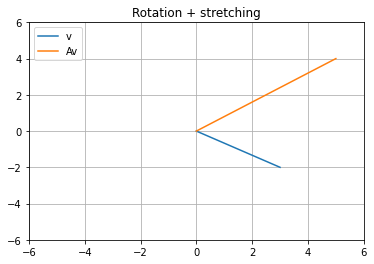

In [ ]:
# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 transformation matrix
A = np.array([ [1,-1], [2,1] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.title('Rotation + stretching')
plt.show()

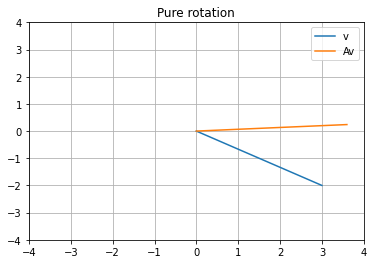

In [ ]:
## pure rotation

# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 rotation matrix
th = 5*np.pi/24
A = np.array([ [math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.title('Pure rotation')
plt.show()


---
# 6: Additive and multiplicative matrix identities
---


In [ ]:
# size of matrices
n = 4

A = np.round( 10*np.random.randn(n,n) )
I = np.eye(n,n)
Z = np.zeros((n,n))

# test both identities
np.array_equal( A@I , A   )
np.array_equal( A   , A@I )
np.array_equal( A   , A+I )

np.array_equal( A   , A+I )
#np.array_equal( A+Z , A@I )


NameError: ignored


---
# 7: Additive and multiplicative symmetric matrices
---


In [4]:
## the additive method

# specify sizes
m = 5
n = 5

# create matrices
A = np.random.randn(m,n)
S = ( A + np.matrix.transpose(A) )/2

print(A)

[[-0.14328511  0.20176125 -0.89761357 -0.26682945 -1.17640669]
 [ 0.14309085  1.25333323 -0.94491877  1.43867973  0.14802247]
 [-0.51786348 -0.12918253  1.78065225 -0.67940839  0.97096463]
 [ 0.72894941 -0.25270777  1.70206822  0.98645637 -1.08158983]
 [-1.18190783  1.97810285  0.76167522 -0.56614392  0.562163  ]]


In [ ]:
print(S)

[[ 0.18698455 -0.31094683 -0.39017824  0.0929291   0.36386724]
 [-0.31094683  0.97421111  0.18963726 -0.09899955 -0.16230355]
 [-0.39017824  0.18963726  0.23104633 -0.23427058 -0.91307233]
 [ 0.0929291  -0.09899955 -0.23427058  0.14089805 -0.65243161]
 [ 0.36386724 -0.16230355 -0.91307233 -0.65243161 -1.26183683]]


In [5]:
# A symmetric matrix minus its transpose should be all zeros
print( S-np.matrix.transpose(S) )


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
## the multiplicative method

# specify sizes
m = 5
n = 3

# create matrices
A   = np.random.randn(m,n)
AtA = np.matrix.transpose(A)@A
AAt = A@np.matrix.transpose(A)

# first, show that they are square
print( AtA.shape )
print( AAt.shape )


# next, show that they are symmetric
print( AtA - np.matrix.transpose(AtA) )
print( AAt - np.matrix.transpose(AAt) )



(3, 3)
(5, 5)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]



---
# 8: Element-wise (Hadamard) multiplication
---


In [ ]:
# any matrix sizes
m = 13
n =  2

# ...but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# note the different syntax compared to @ for matrix multiplication
C = np.multiply( A,B )

print(C)


[[ -7.66323146e-01  -8.25906929e-02]
 [ -3.90966578e-02   3.55398187e-01]
 [  2.56140438e-01   8.10723166e-02]
 [ -3.34874260e+00  -1.01767138e+00]
 [  1.10493988e+00   1.31099017e-01]
 [ -2.04041307e+00  -1.72216741e+00]
 [ -3.82003034e-02   6.25393221e-01]
 [ -5.75491697e-01   1.34932994e+00]
 [  1.06584279e+00  -6.19962559e-01]
 [ -3.27215150e-01   4.13362140e-02]
 [  1.86198252e-01  -1.57051310e-01]
 [ -1.91929460e-03   2.33527471e-01]
 [ -1.95764360e-01   1.84572276e-01]]



---
# 9: Multiplication of two symmetric matrices
---


In [ ]:
# using the sympy library
from sympy import *

a,b,c,d,e,f,g,h,k,l,m,n,o,p,q,r,s,t,u = symbols('a b c d e f g h k l m n o p q r s t u', real=True)

# symmetric and constant-diagonal matrices
A = Matrix([ [a,b,c,d],
             [b,a,e,f],
             [c,e,a,h],
             [d,f,h,a]   ])

B = Matrix([ [l,m,n,o],
             [m,l,q,r],
             [n,q,l,t],
             [o,r,t,l]   ])


# confirmation that A and B are symmetric
print( A - A.transpose() )
print( B - B.transpose() )

# ... and constant diagonal
for i in range(0,np.size(A,0)):
    print( A[i,i] )
for i in range(0,np.size(B,0)):
    print( B[i,i] )


Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
a
a
a
a
l
l
l
l


In [ ]:

# but AB neq (AB)'
A@B - (A@B).T

# maybe for a submatrix?
n = 3
A1 = A[ 0:n,0:n ]
B1 = B[ 0:n,0:n ]

A1@B1 - (A1*B1).T

Matrix([
[         0,  c*q - e*n, b*q - e*m],
[-c*q + e*n,          0, b*n - c*m],
[-b*q + e*m, -b*n + c*m,         0]])


---
# 10: Frobenius dot-product
---


Frobenius dot-product is a measure of similarity or distances between two matrices.


In [ ]:
# any matrix sizes
m = 9
n = 4

# but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# first vectorize, then vector-dot-product
Av = np.reshape( A,m*n, order='F' ) # order='F' reshapes by columns instead of by rows
Bv = np.reshape( B,m*n, order='F' )
frob_dp = np.dot( Av,Bv )

# trace method
frob_dp2 = np.trace( np.matrix.transpose(A)@B )
print(frob_dp2)
print(frob_dp)

# matrix norm
Anorm  = np.linalg.norm(A,'fro')
Anorm2 = np.sqrt( np.trace( np.matrix.transpose(A)@A ) )
print(Anorm)
print(Anorm2)

-0.14464283250207544
-0.14464283250207607
6.001639307617599
6.001639307617599


# 11: Matrix norms

In [ ]:
# Create a matrix
A = np.array([ [1,2,3], [4,5,6], [7,7,9] ])
# optional orthogonal matrix to show that 2-norm is 1
Q,R = np.linalg.qr(np.random.randn(5,5))
# A = Q

# Frobenius norm
normFrob = np.linalg.norm(A,'fro')

# induced 2-norm
normInd2 = np.linalg.norm(A,2)
# note: computed as below
lamb = np.sqrt( np.max(np.linalg.eig(A.T@A)[0]) )

# schatten p-norm
p = 1
s = np.linalg.svd(A)[1] # get singular values
normSchat = np.sum(s**p)**(1/p)


# % show all norms for comparison
print(normFrob,normInd2,normSchat)

16.431676725154983 16.392007827749776 17.818241836274783
